# TP FINAL: Analisis de base de datos.

¿Las agrupaciones industriales favorecen al desarrollo económico a partir de la generación de empleo?
¿En cuáles municipios hay mayor cantidad de empleados y empresas?
¿Tiene relación la zona en la que se encuentran los municipios con la mayor cantidad de empresas y empleados?

Base de datos elegida: [Agrupamientos Industriales.csv](https://drive.google.com/file/d/1VeXwERXpYWjuA0-os05LglETEc8nWecO/view?usp=drive_link)

El objetivo a través de este análisis es determinar si los agrupamientos industriales favorecen al desarrollo económico a partir de la generación de empleo y si esto tiene relación con la zona en la que se ubican.
Implementar las diferentes herramientas vistas a lo largo de la cursada nos permitirá llegar a una mejor visualización y a un mejor análisis para responder a nuestros interrogantes.

Antes de comenzar con nuestro análisis debemos realizar unos pasos previos.
Como primera instancia, intalamos los paquetes necesarios que nos permitiran ejecutar el código correctamente, para luego importar éstos paquetes.

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Luego debemos acceder a la base de datos elegida que se encuentra en la carpeta del trabajo final de drive.

In [ ]:
#Damos permiso a las carpetas de drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Seleccionamos la ruta de acceso de nuestra base de datos.
df = pd.read_csv("/content/drive/MyDrive/IMD/TPFINAL/agrupamientos-industriales.csv")

Ahora si, comenzamos con nuestro análisis.

# PASO N°1: OBSERVAR LOS DATOS
En este paso vamos a examinar los datos para tener una idea inicial de su contenido, variables y estructura.

In [ ]:
#Visualizamos los primeros 5 datos de nuestra base de datos.
print(df.head())


   municipio_id municipio_nombre             localidad  \
0         60007    Adolfo Alsina                Carhué   
1         60021          Alberti               Alberti   
2         60028  Almirante Brown               Burzaco   
3         60077        Arrecifes             Arrecifes   
4         60035       Avellaneda  Sarandí, Villa Luján   

  nombre_agrupamiento_promotor          tipologia iniciativa  \
0            SIP Adolfo Alsina  Sector industrial    Oficial   
1                SIP Alberti 1  Sector industrial    Oficial   
2         SIP Almirante Brown   Sector industrial      Mixto   
3                SIP Arrecifes  Sector industrial    Oficial   
4               PI Villa Luján  Parque industrial      Mixto   

            tipo_segun_origen numero_decreto numero_decreto_de_ampliacion  \
0                  Originario        8528/87                          N/C   
1                  Originario        5893/86                          N/C   
2  Parcelamiento preexistente      

In [ ]:
#Visualizamos los ultimos 5 datos de nuestra base de datos.
df.tail(5)

,municipio_id,municipio_nombre,localidad,nombre_agrupamiento_promotor,tipologia,iniciativa,tipo_segun_origen,numero_decreto,numero_decreto_de_ampliacion,ubicacion,...,reglamento_interno,area_de_reserva,infraestructura_basica,servicio_ adicionales,centro_de_capacitación_en_el_agrupamiento,vinculación_con_un_centro_de_formación_externo,numero_empresas,numero_empleados_estimado,seccion_electoral,interior_conurbano
78,60826,Trenque Lauquen,Trenque Lauquen,SIP Trenque Lauquen,Sector industrial,Oficial,Originario,2723/88,N/C,Sobre la Ruta Nacional Nº 5. km 443,...,No,s/d,"Asfalto, consolidado de calles, energía, cero,...",Seguridad privada,s/d,s/d,15,450,4ta. sección,Interior
79,60833,Tres Arroyos,Tres Arroyos,PI Tres Arroyos,Parque industrial,Oficial,Originario,3361/75,N/C,Sobre Ruta Nacional N° 3 altura Km 495. a 5 Km...,...,SI,Si,"Asfalto, consolidado de calles, energía, cero,...","Seguridad privada, circuito cerrado de Segurid...",Si,No,40,2500,6ta. sección,Interior
80,60854,25 de mayo,25 de mayo,SIP 25 de Mayo,Sector industrial,Oficial,Originario,2952/85,N/C,Acceso a 25 de Mayo: Acceso Arturo Ilia S/N de...,...,No,s/d,"Asfalto, consolidado de calles, energía, cero,...",s/d,No,No,35,1000,7ma. sección,Interior
81,60875,Villarino,Médanos,SIP Médanos,Sector industrial,Oficial,Originario,4235/96,N/C,Sobre la Ruta Nacional Nº 22. km 731.15,...,No,Si,"Consolidado de calles, energía, cero, banda de...",s/d,No,Si,4,70,6ta. sección,Interior
82,60882,Zárate,Zárate,PIP Parana de las Palmas,Parque industrial,Privado,Originario,860/13,N/C,Camino A Ruta Nacional Nº 9 KM. 91.5• Camino a...,...,SI,Si,"Pavimento, energía, cero, desagües pluviales, ...",s/d,s/d,s/d,10,600,2da sección,Interior


In [ ]:
#Vemos su estructura (filas y columnas).
print(df.shape)

(83, 30)


# PASO N°2: ENCONTRAR VALORES FALTANTES.
En este paso vamos a ver si hay valores faltantes para luego decidir si los eliminamos.

In [ ]:
#Vemos los valores faltantes
valores_faltantes = df.isnull().sum()
print(valores_faltantes)


municipio_id                                      0
municipio_nombre                                  0
localidad                                         0
nombre_agrupamiento_promotor                      0
tipologia                                         0
iniciativa                                        0
tipo_segun_origen                                 0
numero_decreto                                    0
numero_decreto_de_ampliacion                      0
ubicacion                                         0
latitud                                           0
longitud                                          0
nombre_de_contacto                                0
institucion                                       0
telefono                                          0
mail_1                                            0
mail_2                                            0
superficie_hectareas                              0
cantidad_lotes_parcelas                           0
lotes_parcel

In [ ]:
#Eliminamos los valores faltantes.
df.dropna()
df.count()

municipio_id                                      83
municipio_nombre                                  83
localidad                                         83
nombre_agrupamiento_promotor                      83
tipologia                                         83
iniciativa                                        83
tipo_segun_origen                                 83
numero_decreto                                    83
numero_decreto_de_ampliacion                      83
ubicacion                                         83
latitud                                           83
longitud                                          83
nombre_de_contacto                                83
institucion                                       83
telefono                                          83
mail_1                                            83
mail_2                                            83
superficie_hectareas                              83
cantidad_lotes_parcelas                       

Dentro de dos variables encontramos valores faltantes, los cuales eliminamos para asegurarnos que los cálculos y análisis posteriores se realicen correctamente

# PASO N°3: CATEGORIZAR LOS VALORES (LIMPIAR).
En este paso vamos a realizar las modificaciones necesarias para facilitar el análisis posterior, como por ejemplo: seleccionar las variables que vamos a utilizar y asegurarnos que sean de tipo númerica.

In [ ]:
#Vemos si hay filas duplicadas.
filas_duplicadas = df[df.duplicated()]
print("numero de filas duplicadas: ", filas_duplicadas.shape)

numero de filas duplicadas:  (0, 30)


In [ ]:
#Seleccionamos las variables que no vamos a utilizar y generamos una nueva base de datos con las variables restantes.
df_cortada = df.drop(columns = ["tipologia","iniciativa","numero_decreto","numero_decreto_de_ampliacion","nombre_de_contacto","institucion","telefono","mail_1","mail_2","superficie_hectareas","cantidad_lotes_parcelas","lotes_parcelas_disponibles","reglamento_interno","area_de_reserva","servicio_ adicionales","centro_de_capacitación_en_el_agrupamiento","vinculación_con_un_centro_de_formación_externo","seccion_electoral"])

In [ ]:
#Visualizamos nuestra nueva base de datos (primeras 5 filas, ultimas 5 filas y la estructura).
df_cortada.head()

,municipio_id,municipio_nombre,localidad,nombre_agrupamiento_promotor,tipo_segun_origen,ubicacion,latitud,longitud,infraestructura_basica,numero_empresas,numero_empleados_estimado,interior_conurbano
0,60007,Adolfo Alsina,Carhué,SIP Adolfo Alsina,Originario,Ruta Nacional Nº 33 y Ruta Prov. Nº 60,-3.716.827,-62.703.989,"Consolidado de calles, energía eléctrica, cerc...",3,100,Interior
1,60021,Alberti,Alberti,SIP Alberti 1,Originario,Av. De Los Inmigrantes N° 60,-3.504.461,-60.276.165,s/d,10,300,Interior
2,60028,Almirante Brown,Burzaco,SIP Almirante Brown,Parcelamiento preexistente,Av. Hipólito Yrigoyen y Ruta Provincial Nº 4,-34.846.915,-58.410.377,"Pavimento, consolidado de calles,energía, desa...",240,20000,Conurbano
3,60077,Arrecifes,Arrecifes,SIP Arrecifes,Originario,Ruta Nac. 8 Km 179.5,-34.024.556,-60.135.054,"Pavimento, consolidado de calles, energía, cer...",15,600,Interior
4,60035,Avellaneda,"Sarandí, Villa Luján",PI Villa Luján,Parcelamiento preexistente,Calle Pitágoras esq. V. de Lujan,-34.700.298,-58.358.576,"Consolidado de calles, energía, cerco perimetr...",30,1400,Conurbano


In [ ]:
df_cortada.tail(5)

,municipio_id,municipio_nombre,localidad,nombre_agrupamiento_promotor,tipo_segun_origen,ubicacion,latitud,longitud,infraestructura_basica,numero_empresas,numero_empleados_estimado,interior_conurbano
78,60826,Trenque Lauquen,Trenque Lauquen,SIP Trenque Lauquen,Originario,Sobre la Ruta Nacional Nº 5. km 443,-35.991.145,-627.024,"Asfalto, consolidado de calles, energía, cero,...",15,450,Interior
79,60833,Tres Arroyos,Tres Arroyos,PI Tres Arroyos,Originario,Sobre Ruta Nacional N° 3 altura Km 495. a 5 Km...,-384.091.666.667,-604.319.444.444,"Asfalto, consolidado de calles, energía, cero,...",40,2500,Interior
80,60854,25 de mayo,25 de mayo,SIP 25 de Mayo,Originario,Acceso a 25 de Mayo: Acceso Arturo Ilia S/N de...,-35.409.395,-60.177.247,"Asfalto, consolidado de calles, energía, cero,...",35,1000,Interior
81,60875,Villarino,Médanos,SIP Médanos,Originario,Sobre la Ruta Nacional Nº 22. km 731.15,-38.810.909,-62.685.272,"Consolidado de calles, energía, cero, banda de...",4,70,Interior
82,60882,Zárate,Zárate,PIP Parana de las Palmas,Originario,Camino A Ruta Nacional Nº 9 KM. 91.5• Camino a...,-340.874.619.518.233,-590.658.473.968.505,"Pavimento, energía, cero, desagües pluviales, ...",10,600,Interior


In [ ]:
print(df_cortada.shape)

(83, 12)


In [ ]:
#Creamos una lista de las variables de nuestra nueva base de datos
print("Lista de columnas:")
print(df_cortada.columns)

Lista de columnas:
Index(['municipio_id', 'municipio_nombre', 'localidad',
       'nombre_agrupamiento_promotor', 'tipo_segun_origen', 'ubicacion',
       'latitud', 'longitud', 'infraestructura_basica', 'numero_empresas',
       'numero_empleados_estimado', 'interior_conurbano'],
      dtype='object')


In [ ]:
#Vemos el tipo de datos de las variables próximas a utilizar
print(df_cortada['municipio_nombre'].dtypes)
print(df_cortada['numero_empleados_estimado'].dtypes)

object
object


In [ ]:
# Convertimos la columna 'numero_empleados_estimado' a tipo numérico
df_cortada['numero_empleados_estimado'] = pd.to_numeric(df_cortada['numero_empleados_estimado'], errors='coerce')

# Verificamos el tipo de datos después de la conversión
print(df_cortada['numero_empleados_estimado'].dtypes)

float64


In [ ]:
# Vemos que tipo de variable es la próxima a utilizar
print(df_cortada['numero_empresas'].dtypes)

object


In [ ]:
# Convertimos la columna 'numero_empresas' a tipo numérico
df_cortada['numero_empresas'] = pd.to_numeric(df_cortada['numero_empresas'], errors='coerce')
# Verificamos el tipo de datos después de la conversión
print(df_cortada['numero_empresas'].dtypes)


float64


# PASO N°4: ENTENDER LA ESTRUCTURA DEL DATO.
En este paso vamos a crear gráficos que nos van a ayudar a representar nuestros interrogantes y encontrar dentro del conjunto de datos valores atípicos o valores extremos.

Queremos saber si las agrupaciones industriales generan trabajo, para esto decidimos cruzar variables para visualizar en que municipio sucede esto según el número de empleados y el número de empresas.

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


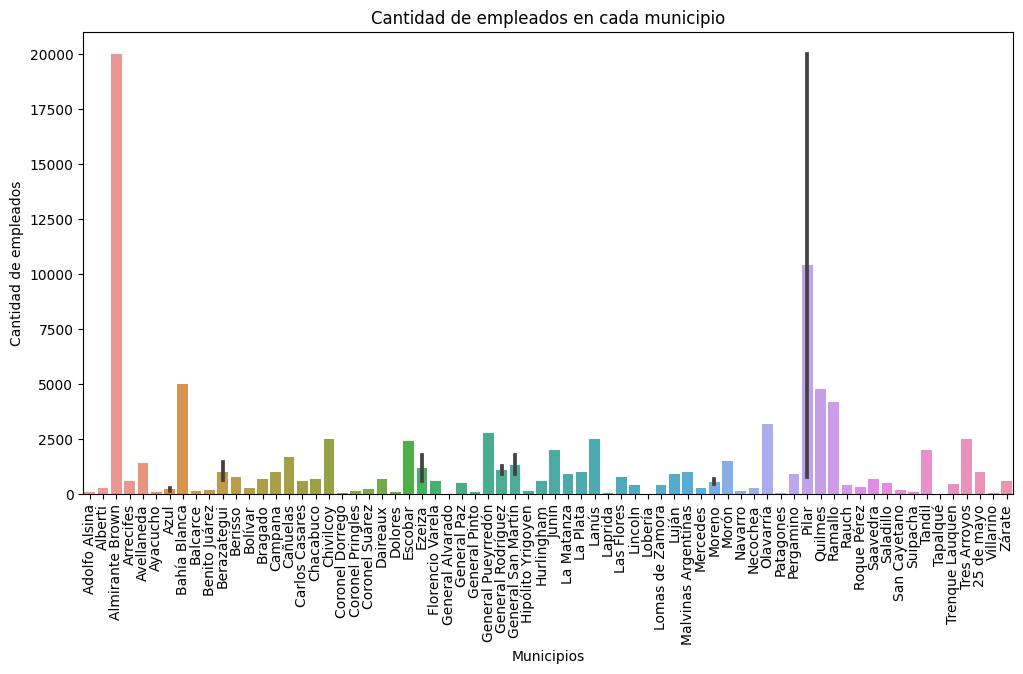

In [ ]:
#Creamos el gráfico para saber la cantidad de empleados que hay en cada municipio
plt.figure(figsize=(12, 6))
sns.barplot(x='municipio_nombre', y='numero_empleados_estimado', data=df_cortada)
plt.xticks(rotation=90)
plt.xlabel('Municipios')
plt.ylabel('Cantidad de empleados')
plt.title('Cantidad de empleados en cada municipio')
plt.show()


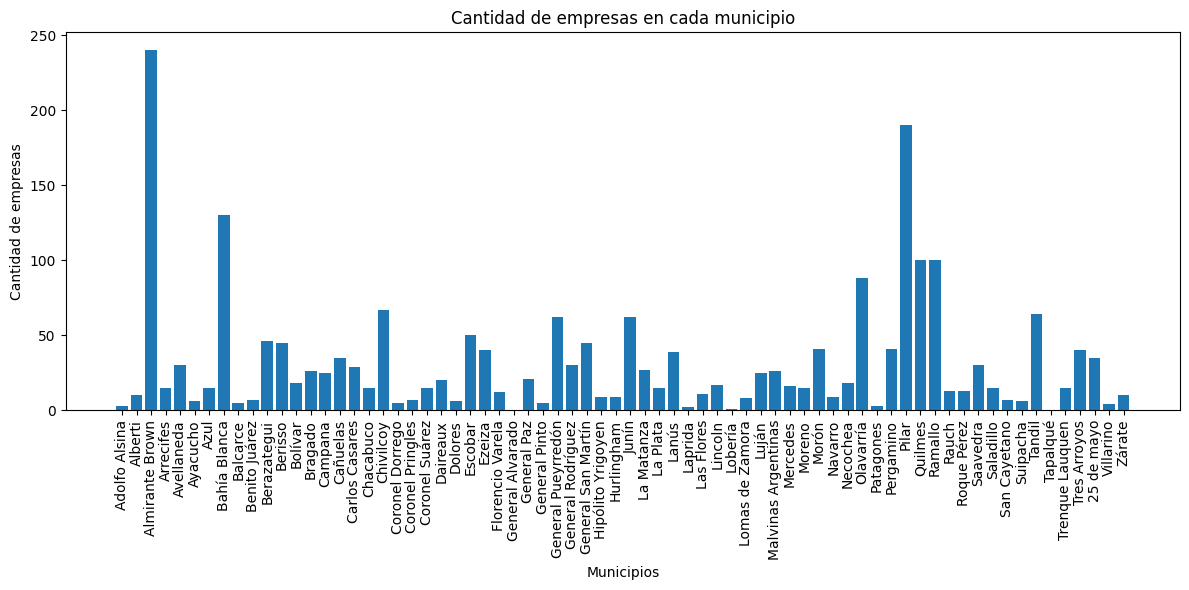

In [ ]:
#Creamos el gráfico para saber la cantidad de empresas que hay en cada municipio
plt.figure(figsize=(12, 6))
x = df_cortada['municipio_nombre']
y = df_cortada['numero_empresas']

plt.bar(x, y)
plt.xlabel('Municipios')
plt.ylabel('Cantidad de empresas')
plt.title('Cantidad de empresas en cada municipio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


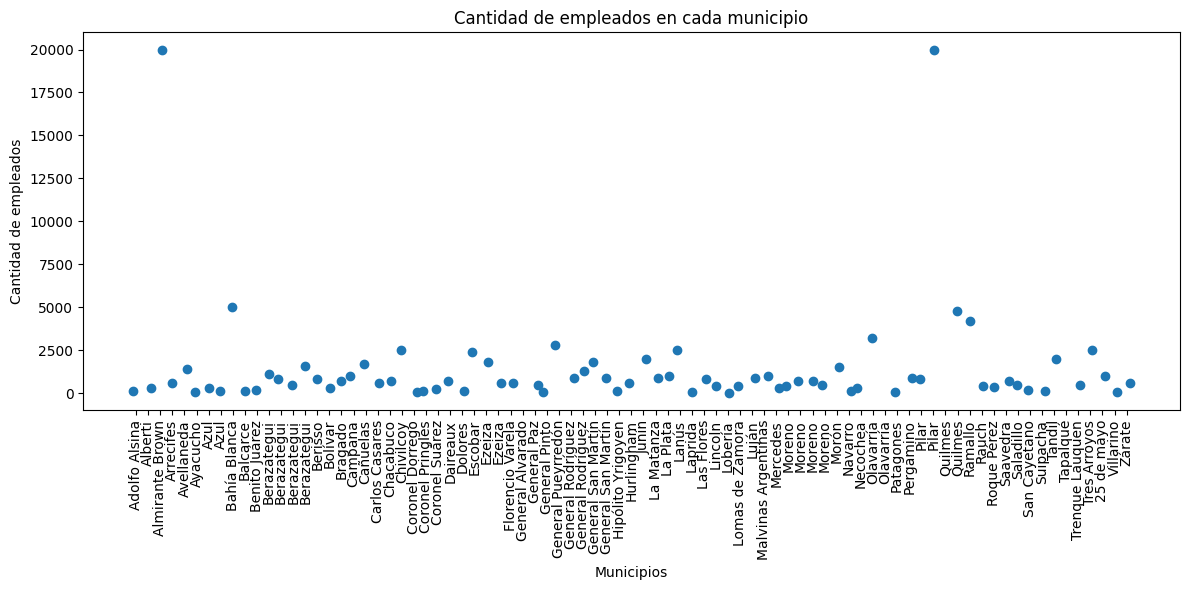

In [ ]:
#Creamos un gráfico con el mismo objetivo anterior pero con otro tipo de gráfico para una visualización diferente.
plt.figure(figsize=(12, 6))
x = np.arange(len(df_cortada['municipio_nombre']))
y = df_cortada['numero_empleados_estimado']

# Ajuste de posición aleatoria para evitar superposición
x_jitter = x + np.random.uniform(-0.3, 0.3, len(x))

plt.scatter(x_jitter, y)
plt.xlabel('Municipios')
plt.ylabel('Cantidad de empleados')
plt.title('Cantidad de empleados en cada municipio')
plt.xticks(x, df_cortada['municipio_nombre'], rotation=90)
plt.tight_layout()
plt.show()

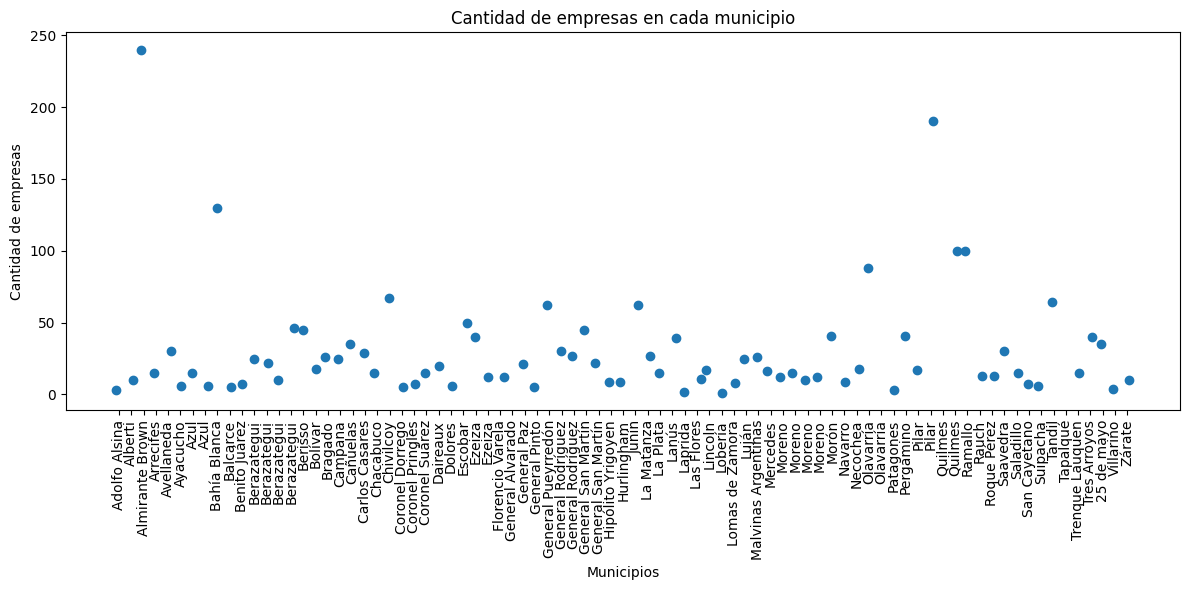

In [ ]:
#Creamos un gráfico con el mismo objetivo anterior pero con otro tipo de gráfico para una visualización diferente.
plt.figure(figsize=(12, 6))
x = np.arange(len(df_cortada['municipio_nombre']))
y = df_cortada['numero_empresas']

# Ajuste de posición aleatoria para evitar superposición
x_jitter = x + np.random.uniform(-0.3, 0.3, len(x))

plt.scatter(x_jitter, y)
plt.xlabel('Municipios')
plt.ylabel('Cantidad de empresas')
plt.title('Cantidad de empresas en cada municipio')
plt.xticks(x, df_cortada['municipio_nombre'], rotation=90)
plt.tight_layout()
plt.show()


A simple vista en los gráficos de barras podemos observar como en dos lugares del conurbano se encuentra la mayor cantidad de empresas y empleados, pero podemos observar en los gráficos de dispersión tanto de la variable "Numero de empleados" como en "Numero de empresas" hay datos extremos en nuestra base de datos, esto quiere decir que se encontró una anomalía que podría afectar al resultado de nuestro análisis.

# PASO N°5: ENCONTRAR OUTLIERS (ANOMALÍAS).

 Este paso implica identificar y manejar valores atípicos o datos anómalos en el conjunto de datos y decidir que hacer con ellos, en este caso los eliminamos y observamos como cambio el resultado.



Hicimos un gráfico de dispersión buscando una relación entre las variables "Número de empresas", "Número de empleados" y "Interior- Conurbano" para observar como se veian los datos anómalos con las tres variables.

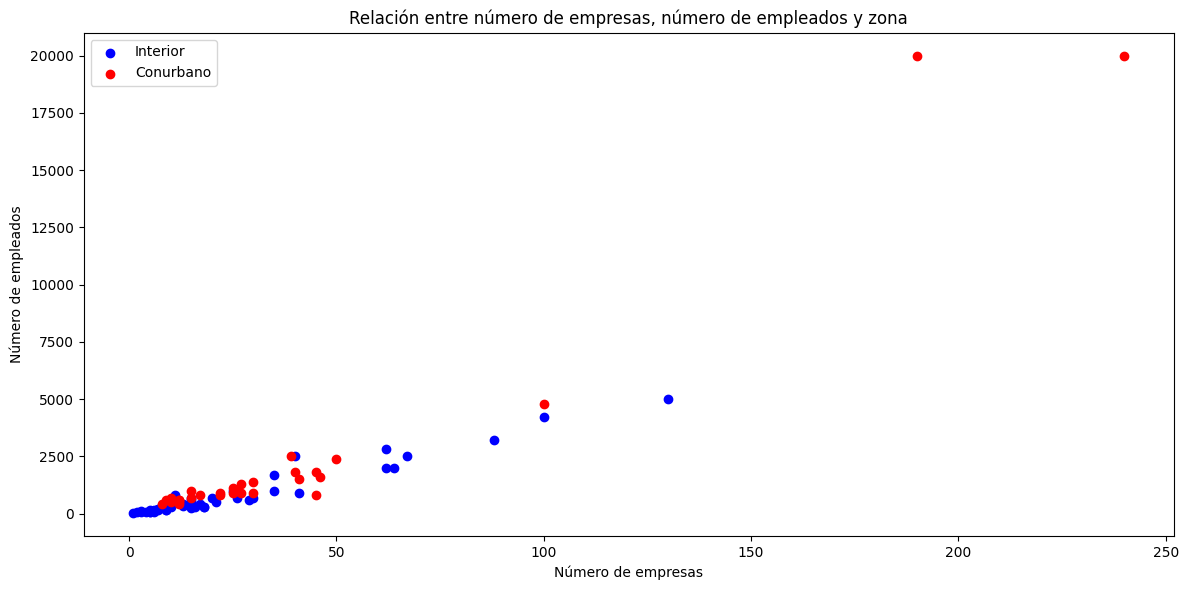

In [ ]:
plt.figure(figsize=(12, 6))

# Obtener los datos para cada categoría de "interior_conurbano"
df_interior = df_cortada[df_cortada['interior_conurbano'] == 'Interior']
df_conurbano = df_cortada[df_cortada['interior_conurbano'] == 'Conurbano']

# Gráfico de dispersión para la categoría "Interior"
plt.scatter(df_interior['numero_empresas'], df_interior['numero_empleados_estimado'], color='blue', label='Interior')

# Gráfico de dispersión para la categoría "Conurbano"
plt.scatter(df_conurbano['numero_empresas'], df_conurbano['numero_empleados_estimado'], color='red', label='Conurbano')

plt.xlabel('Número de empresas')
plt.ylabel('Número de empleados')
plt.title('Relación entre número de empresas, número de empleados y zona')
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

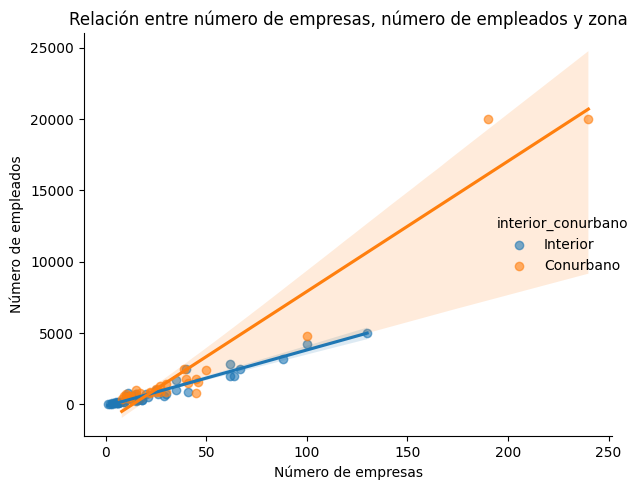

In [ ]:
#Creamos ungráfico con linea de regresión para encontrar la relación de la variables.
plt.figure(figsize=(10, 6))
sns.lmplot(x='numero_empresas', y='numero_empleados_estimado', data=df_cortada, hue='interior_conurbano', scatter_kws={'alpha': 0.6})
plt.title('Relación entre número de empresas, número de empleados y zona')
plt.xlabel('Número de empresas')
plt.ylabel('Número de empleados')
plt.tight_layout()
plt.show()


Podemos observar como claramente hay dos datos del Conurbano que tienen valores extremos por lo que debemos eliminarlos y ver como resulta.

In [ ]:
# Eliminar las filas correspondientes a "pilar" y "almirante brown" en el DataFrame original
df_cortada.drop(df_cortada[df_cortada['municipio_nombre'].isin(['Pilar', 'Almirante Brown'])].index, inplace=True)

# Crear una copia del DataFrame actualizado
df_graficos = df_cortada.copy()

# Verificar la nueva base de datos
print(df_graficos)


    municipio_id municipio_nombre             localidad  \
0          60007    Adolfo Alsina                Carhué   
1          60021          Alberti               Alberti   
3          60077        Arrecifes             Arrecifes   
4          60035       Avellaneda  Sarandí, Villa Luján   
5          60042         Ayacucho              Ayacucho   
..           ...              ...                   ...   
78         60826  Trenque Lauquen       Trenque Lauquen   
79         60833     Tres Arroyos          Tres Arroyos   
80         60854       25 de mayo            25 de mayo   
81         60875        Villarino               Médanos   
82         60882           Zárate                Zárate   

   nombre_agrupamiento_promotor           tipo_segun_origen  \
0             SIP Adolfo Alsina                  Originario   
1                 SIP Alberti 1                  Originario   
3                 SIP Arrecifes                  Originario   
4                PI Villa Luján  Parcel

In [ ]:
#Volvemos a verificar si hay valores faltantes y a eliminarlos para asegurarnos una mejor conclusion.
df_graficos.isnull().sum()

municipio_id                    0
municipio_nombre                0
localidad                       0
nombre_agrupamiento_promotor    0
tipo_segun_origen               0
ubicacion                       0
latitud                         0
longitud                        0
infraestructura_basica          0
numero_empresas                 4
numero_empleados_estimado       4
interior_conurbano              0
dtype: int64

In [ ]:
df_graficos = df_graficos.dropna(subset=['numero_empresas', 'numero_empleados_estimado'])


<Figure size 1000x600 with 0 Axes>

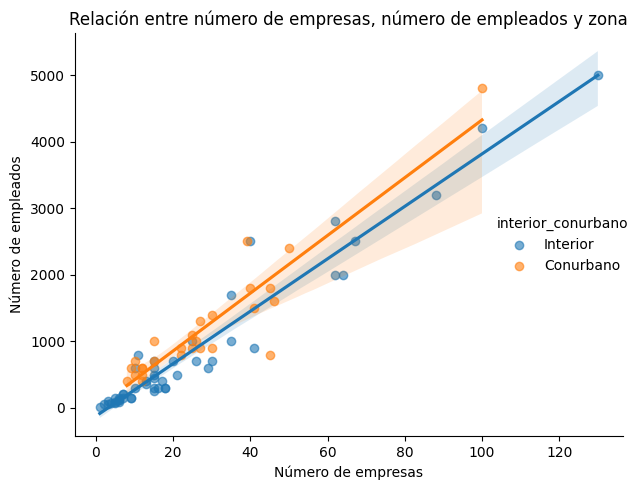

In [ ]:
#Volvemos a realizar el gráfico de dispersión con linea de regresión con los valores extremos eliminados.
plt.figure(figsize=(10, 6))
sns.lmplot(x='numero_empresas', y='numero_empleados_estimado', data=df_graficos, hue='interior_conurbano', scatter_kws={'alpha': 0.6})
plt.title('Relación entre número de empresas, número de empleados y zona')
plt.xlabel('Número de empresas')
plt.ylabel('Número de empleados')
plt.tight_layout()
plt.show()



En este último gráfico podemos observar como eliminando los valores extremos se obtiene una mejor distribución de los datos, generando una mejor precisión al momento de responder a nuestros interrogantes.


# PASO N°6: ENCONTRAR RELACIONES.
En este paso se exploran las relaciones entre variables, se pueden calcular correlaciones, realizar pruebas estadísticas y generar visualizaciones para descubrir patrones, tendencias o asociaciones entre las variables.

<Figure size 1000x600 with 0 Axes>

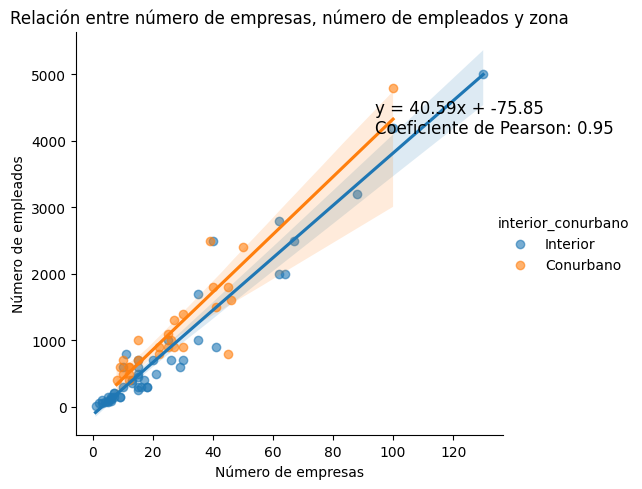

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

plt.figure(figsize=(10, 6))

# Gráfico de dispersión con línea de regresión
sns.lmplot(x='numero_empresas', y='numero_empleados_estimado', data=df_graficos, hue='interior_conurbano', scatter_kws={'alpha': 0.6})

# Cálculo de la regresión lineal y obtención de los coeficientes
x = df_graficos['numero_empresas'].astype(float)
y = df_graficos['numero_empleados_estimado'].astype(float)
regression = linregress(x, y)
m = regression.slope
b = regression.intercept

# Anotación de la ecuación de regresión
equation = f"y = {m:.2f}x + {b:.2f}"
plt.annotate(equation, xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12)

# Cálculo del coeficiente de correlación de Pearson
pearson_corr = np.corrcoef(x, y)[0, 1]
corr_text = f"Coeficiente de Pearson: {pearson_corr:.2f}"
plt.annotate(corr_text, xy=(0.7, 0.75), xycoords='axes fraction', fontsize=12)

plt.title('Relación entre número de empresas, número de empleados y zona')
plt.xlabel('Número de empresas')
plt.ylabel('Número de empleados')
plt.tight_layout()
plt.show()


In [ ]:
#Calculamos la línea de regresión y el coeficiente de relación de pearson para poder cuantificar la relación entre las variables.
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Calcular la línea de regresión
x = df_graficos['numero_empresas'].astype(float)
y = df_graficos['numero_empleados_estimado'].astype(float)
coeficientes = np.polyfit(x, y, 1)
pendiente = coeficientes[0]
intercepto = coeficientes[1]
ecuacion_regresion = f"y = {pendiente:.2f}x + {intercepto:.2f}"

# Calcular el coeficiente de correlación de Pearson
pearson_corr = df_graficos['numero_empresas'].corr(df_graficos['numero_empleados_estimado'])

# Imprimir los resultados
print(f"Ecuación de la regresión: y = {m:.2f}x + {b:.2f}")
print(f"Coeficiente de correlación de Pearson: {pearson_corr:.2f}")


Ecuación de la regresión: y = 40.59x + -75.85
Coeficiente de correlación de Pearson: 0.95


Una vez que pudimos calcular la relación entre todas las variables vamos a calcularlas por separado para definir si efectivamente hay una zona en donde se genera mas empleo.

In [ ]:
#Generamos una nueva base de datos con los valores de la variable "Interior-Conurbano" pero solo con los datos que sean "Interior".
df_interior = df_graficos[df_graficos['interior_conurbano'] == 'Interior'].copy()


In [ ]:
#Comprobamos que se haya generado bien la nueva base de datos con solo los valores "Interior"
df_interior.head (5)

,municipio_id,municipio_nombre,localidad,nombre_agrupamiento_promotor,tipo_segun_origen,ubicacion,latitud,longitud,infraestructura_basica,numero_empresas,numero_empleados_estimado,interior_conurbano
0,60007,Adolfo Alsina,Carhué,SIP Adolfo Alsina,Originario,Ruta Nacional Nº 33 y Ruta Prov. Nº 60,-3.716.827,-62.703.989,"Consolidado de calles, energía eléctrica, cerc...",3.0,100.0,Interior
1,60021,Alberti,Alberti,SIP Alberti 1,Originario,Av. De Los Inmigrantes N° 60,-3.504.461,-60.276.165,s/d,10.0,300.0,Interior
3,60077,Arrecifes,Arrecifes,SIP Arrecifes,Originario,Ruta Nac. 8 Km 179.5,-34.024.556,-60.135.054,"Pavimento, consolidado de calles, energía, cer...",15.0,600.0,Interior
5,60042,Ayacucho,Ayacucho,Sip Ayacucho,Originario,Ruta Provincial Nº 50 y Circunvalación Noroeste,-37.153.806,-58.508.247,"Consolidado de calles, energía eléctrica, cerc...",6.0,80.0,Interior
6,60049,Azul,Azul,PI Azul 1,Originario,A 4.5 Km del casco urbano sobre Av. Circunvala...,-367.624,-5.983.944,"Consolidado de calles, energía, cerco perimetr...",15.0,300.0,Interior


In [ ]:
df_interior.shape

(49, 12)

In [ ]:
#Generamos una nueva base de datos con los valores de la variable "Interior-Conurbano" pero solo con los datos que sean "Conurbano".
df_conurbano = df_graficos[df_graficos['interior_conurbano'] == 'Conurbano'].copy()

In [ ]:
#Comprobamos que se haya generado bien la nueva base de datos con solo los valores "Conurbano"

df_conurbano.head (5)

,municipio_id,municipio_nombre,localidad,nombre_agrupamiento_promotor,tipo_segun_origen,ubicacion,latitud,longitud,infraestructura_basica,numero_empresas,numero_empleados_estimado,interior_conurbano
4,60035,Avellaneda,"Sarandí, Villa Luján",PI Villa Luján,Parcelamiento preexistente,Calle Pitágoras esq. V. de Lujan,-34.700.298,-58.358.576,"Consolidado de calles, energía, cerco perimetr...",30.0,1400.0,Conurbano
11,60091,Berazategui,El Pato,Pibera,Originario,Ruta Nacional Nº 2 aproximadamente altura Km. ...,-34.875.591,-58.175.156,"Pavimento, energía eléctrica, cerco perimetral...",25.0,1100.0,Conurbano
12,60091,Berazategui,El Pato,CIR 2,Refuncionalización,Sobre la Ruta Nacional Nº 2 (altura Km. 37.5) ...,-34.868.342,-58.177.309,"Pavimento, energía, cerco perimetral, desagües...",22.0,800.0,Conurbano
13,60091,Berazategui,Hudson,CoCEMA - Polo Temático Mueblero Maderero Beraz...,Originario,AU La Plata-Bs.As. Km 30.5 Berazategui,-347.762.706.656.751,-581.616.638.872.947,"Pavimento, energía, cerco, banda de forestació...",10.0,500.0,Conurbano
14,60091,Berazategui,Plátanos,PI Plátanos,Refuncionalización,Avenida Nicolás Milazzo Nº3251. Plátanos. Part...,-34.786.726,-58.179.133,"Energía, cerco perimetral, comunicaciones, gas",46.0,1600.0,Conurbano


In [ ]:
df_conurbano.shape

(27, 12)

In [ ]:
# Calcular la línea de regresión
x = df_interior['numero_empresas'].astype(float)
y = df_interior['numero_empleados_estimado'].astype(float)
coeficientes = np.polyfit(x, y, 1)
pendiente = coeficientes[0]
intercepto = coeficientes[1]
ecuacion_regresion = f"y = {pendiente:.2f}x + {intercepto:.2f}"

# Calcular el coeficiente de correlación de Pearson
pearson_corr = df_interior['numero_empresas'].corr(df_interior['numero_empleados_estimado'])

# Imprimir los resultados
print(f"Ecuación de la regresión: y = {m:.2f}x + {b:.2f}")
print(f"Coeficiente de correlación de Pearson: {pearson_corr:.2f}")

Ecuación de la regresión: y = 40.59x + -75.85
Coeficiente de correlación de Pearson: 0.97


In [ ]:
# Calcular la línea de regresión
x = df_conurbano['numero_empresas'].astype(float)
y = df_conurbano['numero_empleados_estimado'].astype(float)
coeficientes = np.polyfit(x, y, 1)
pendiente = coeficientes[0]
intercepto = coeficientes[1]
ecuacion_regresion = f"y = {pendiente:.2f}x + {intercepto:.2f}"

# Calcular el coeficiente de correlación de Pearson
pearson_corr = df_conurbano['numero_empresas'].corr(df_conurbano['numero_empleados_estimado'])

# Imprimir los resultados
print(f"Ecuación de la regresión: y = {m:.2f}x + {b:.2f}")
print(f"Coeficiente de correlación de Pearson: {pearson_corr:.2f}")

Ecuación de la regresión: y = 40.59x + -75.85
Coeficiente de correlación de Pearson: 0.93


# CONCLUSIONES

Como vimos la línea de regresión era igual en ambas zonas y en el coeficiente de Pearson había una mínima diferencia con resultados cerca de +1 lo que indicaría que tiene una correlación positiva , es decir, que si una variable aumenta la otra también  tanto en el interior como en el conurbano.

Podemos concluir que los parques industriales favorecen al desarrollo económico al generar empleo tanto en el interior como en el conurbano y que la ubicación geográfica de los municipios (interior o conurbano) no influye en ese desarrollo.
